In [ ]:
#

## Get the data
https://www.kaggle.com/datasets/dansbecker/food-101
The images weare working with are from the Food-101 dataset. However we modify the dataset for 2 classes.
🥫

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-11-13 05:41:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.207, 108.177.112.207, 74.125.124.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   114MB/s    in 0.9s    

2023-11-13 05:41:47 (114 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data(become one with it)

In [2]:
!ls pizza_steak/

test  train


In [3]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
import os
#Walk through Pizza_steak directory and list number of files.

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Nov 13 05:41 .
drwxr-xr-x 1 root root 4096 Nov 13 05:41 ..
drwxr-xr-x 4 root root 4096 Nov 13 05:41 test
drwxr-xr-x 4 root root 4096 Nov 13 05:41 train


## Another way to find out how many images are in file.

In [8]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## To visulize the our images, first lets get the class names programmatically.

In [9]:
#Get the classnames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))# Created a list of class names from the sundirectory.
#class_names = class_names[1:] if .Ds_store are available.
print(class_names)

['pizza' 'steak']


In [10]:
#Let's visulize the our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (We'll view images from here)
  target_folder = target_dir + target_class

  #Get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape: {img.shape}") #show the shape of images
  return img

['1638227.jpg']
image shape: (512, 512, 3)


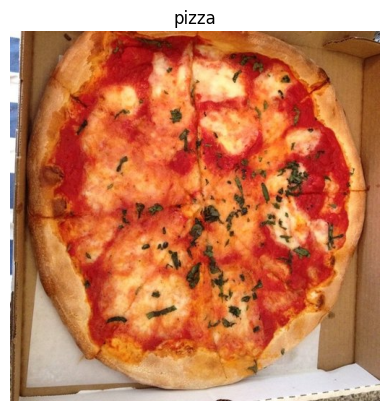

In [11]:
# View random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [12]:
img.dtype

dtype('uint8')

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[251, 255, 255],
        [251, 255, 255],
        [254, 253, 255],
        ...,
        [ 91,  86,  80],
        [ 68,  63,  59],
        [115, 110, 106]],

       [[252, 254, 253],
        [253, 254, 255],
        [254, 253, 255],
        ...,
        [ 74,  69,  63],
        [ 80,  75,  71],
        [114, 109, 105]],

       [[254, 255, 249],
        [254, 255, 249],
        [254, 253, 249],
        ...,
        [ 82,  75,  69],
        [141, 133, 130],
        [ 93,  85,  82]],

       ...,

       [[164, 140, 116],
        [149, 123, 100],
        [ 87,  59,  35],
        ...,
        [ 77,  60,  42],
        [101,  84,  68],
        [117, 100,  84]],

       [[140, 116,  92],
        [131, 105,  82],
        [ 82,  54,  30],
        ...,
        [ 93,  77,  61],
        [119, 103,  88],
        [130, 114,  99]],

       [[143, 119,  95],
        [135, 109,  86],
        [ 88,  60,  36],
        ...,
        [125, 109,  9

In [14]:
#View image shape
img.shape # return 5 color channels/ height, width, color channels.


(512, 512, 3)

In [15]:
#Get all the Pixel valu in to 10 and 1.
img/255.

array([[[0.98431373, 1.        , 1.        ],
        [0.98431373, 1.        , 1.        ],
        [0.99607843, 0.99215686, 1.        ],
        ...,
        [0.35686275, 0.3372549 , 0.31372549],
        [0.26666667, 0.24705882, 0.23137255],
        [0.45098039, 0.43137255, 0.41568627]],

       [[0.98823529, 0.99607843, 0.99215686],
        [0.99215686, 0.99607843, 1.        ],
        [0.99607843, 0.99215686, 1.        ],
        ...,
        [0.29019608, 0.27058824, 0.24705882],
        [0.31372549, 0.29411765, 0.27843137],
        [0.44705882, 0.42745098, 0.41176471]],

       [[0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059],
        [0.99607843, 0.99215686, 0.97647059],
        ...,
        [0.32156863, 0.29411765, 0.27058824],
        [0.55294118, 0.52156863, 0.50980392],
        [0.36470588, 0.33333333, 0.32156863]],

       ...,

       [[0.64313725, 0.54901961, 0.45490196],
        [0.58431373, 0.48235294, 0.39215686],
        [0.34117647, 0

## An End-To-End Encoding.
Find the pattern of the images.


*   Load our images
*   Prepocess our images
*   Build a CNN to find the patterns in our images.
*   Fit the CNNto our training models



In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the Seed
tf.random.set_seed(42)

# Preprocess data (get all pixel values between 0 and 1, known as scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'  # Corrected path for the test directory

# Import data from the directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,  # Corrected batch size
                                               target_size=(224, 224),  # Added target_size
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (similar to the Tiny VGG model)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 130s 3s/step - loss: 0.5448 - accuracy: 0.7313 - val_loss: 0.4911 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 133s 3s/step - loss: 0.4366 - accuracy: 0.7920 - val_loss: 0.3562 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 136s 3s/step - loss: 0.3933 - accuracy: 0.8233 - val_loss: 0.4583 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 130s 3s/step - loss: 0.3711 - accuracy: 0.8420 - val_loss: 0.3630 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 120s 3s/step - loss: 0.3166 - accuracy: 0.8700 - val_loss: 0.3256 - val_accuracy: 0.8640


47